In [2]:
import pandas as pd
import numpy as np 
import json 
from pandas.io.json import json_normalize 
import requests 
import bs4 
from bs4 import BeautifulSoup
import folium 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
import sklearn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing th

In [3]:
csv_path='https://data.chhs.ca.gov/dataset/2df3e19e-9ee4-42a6-a087-9761f82033f6/resource/47af979d-8685-4981-bced-96a6b79d3ed5/download/covid19hospitalbycounty.csv'
cal_df = pd.read_csv(csv_path)
cal_df.head(5)

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Alameda,2020-03-29,36.0,91.0,NaN,NaN,20.0,16.0,119.0
1,Marin,2020-03-29,7.0,13.0,NaN,NaN,2.0,6.0,11.0
2,Solano,2020-03-29,7.0,27.0,NaN,NaN,4.0,1.0,28.0
3,San Mateo,2020-03-29,46.0,27.0,NaN,NaN,16.0,10.0,28.0
4,Mendocino,2020-03-29,1.0,11.0,NaN,NaN,0.0,0.0,1.0


In [4]:
cal_df = cal_df.tail(56)
cal_df.drop(columns=['todays_date','hospitalized_covid_confirmed_patients','hospitalized_suspected_covid_patients','hospitalized_covid_patients','icu_covid_confirmed_patients','icu_suspected_covid_patients'],inplace=True)

In [5]:
cal_df.sort_values('county',inplace=True)
cal_df.reset_index(drop=True,inplace=True)
cal_df.head()

,county,all_hospital_beds,icu_available_beds
0,Alameda,2496.0,94.0
1,Amador,54.0,2.0
2,Butte,414.0,11.0
3,Calaveras,33.0,2.0
4,Colusa,48.0,0.0


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


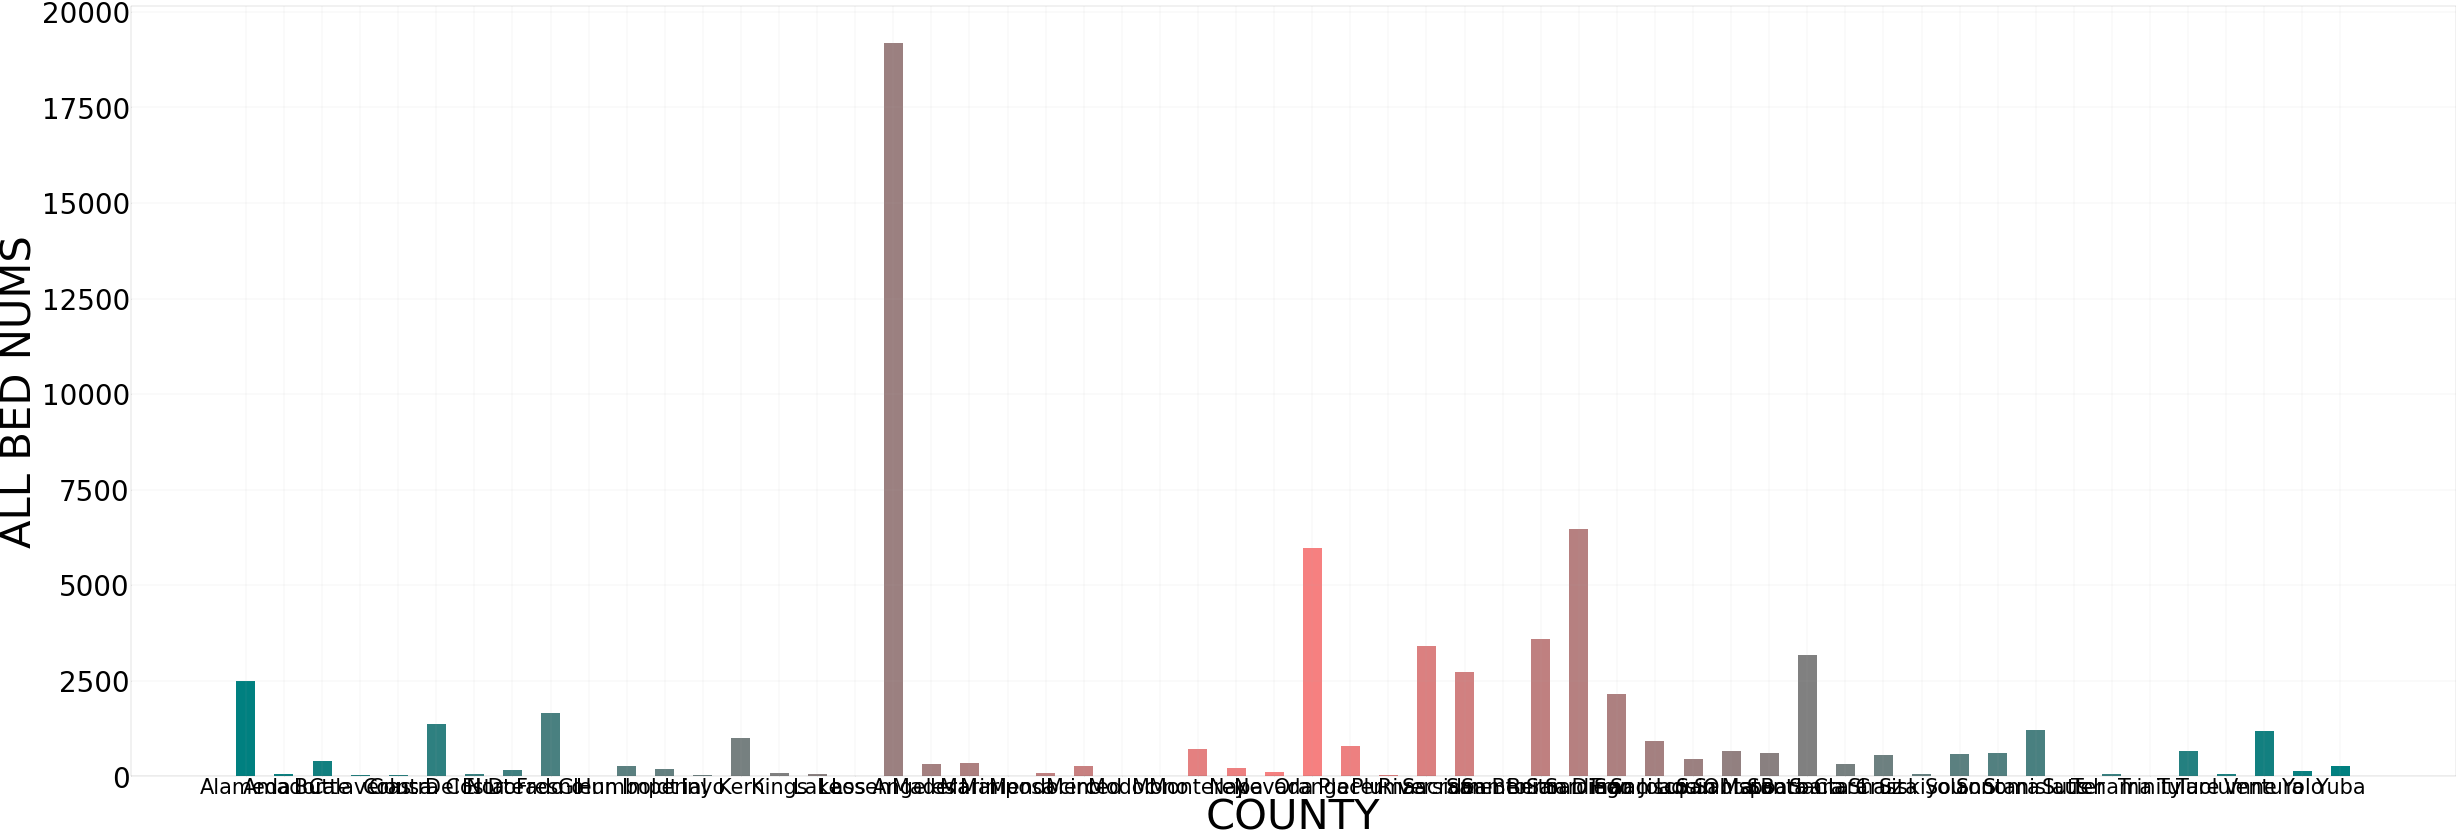

In [6]:
bar1_df = cal_df[['county','all_hospital_beds']]

def plot_bar_color(data, x ,xlabel,ylabel,path="color.png"):
    # data：条形图数据
    # x:x轴坐标
    # path：图片保存路径

    # 创建颜色序列
    colors = []
    for _ in range(int(len(data) / 2)):
        colors.append([_ / int(len(data) / 2), 0.5, 0.5])
    colors = colors + colors[::-1]

    # 创建x轴显示的参数（此功能在与在图像中x轴仅显示能被10整除的刻度，避免刻度过多分不清楚）
    x_tick = x
   
    # 创建一个分辨率为3000*1000的空白画布
    plt.figure(figsize=(300, 100), dpi=10)
    
    # 创建一个字体样式
    font2 = {'family': 'Times New Roman',
             'weight': 'normal',
             'size': 300, }
  
    # 设置x轴的说明
    plt.xlabel(xlabel, font2)
    # 设置y轴的说明
    plt.ylabel(ylabel, font2)
    # 打开网格线
    plt.grid()
    # 绘制条形图
    plt.bar(range(len(data)), data, color=colors, width=0.5)
    # 显示x轴刻度
    plt.xticks(range(len(x_tick)), x_tick, size=150)
    # 显示y轴刻度
    plt.yticks(size=200)
    # 获取当前图像句柄
    fig = plt.gcf()
    # plt.show()
    # 存储当前图像
    fig.savefig(path)
    
plot_bar_color(bar1_df['all_hospital_beds'],bar1_df['county'],'COUNTY','ALL BED NUMS')

plt.show()

In [7]:
dfmax=bar1_df.nlargest(1,'all_hospital_beds',keep='all')
print(dfmax)
print('the rich beds of cuntry is '+ str(dfmax['county']))
print('have beds mun is' + str(dfmax['all_hospital_beds']))

         county  all_hospital_beds
17  Los Angeles            19183.0
the rich beds of cuntry is 17    Los Angeles
Name: county, dtype: object
have beds mun is17    19183.0
Name: all_hospital_beds, dtype: float64


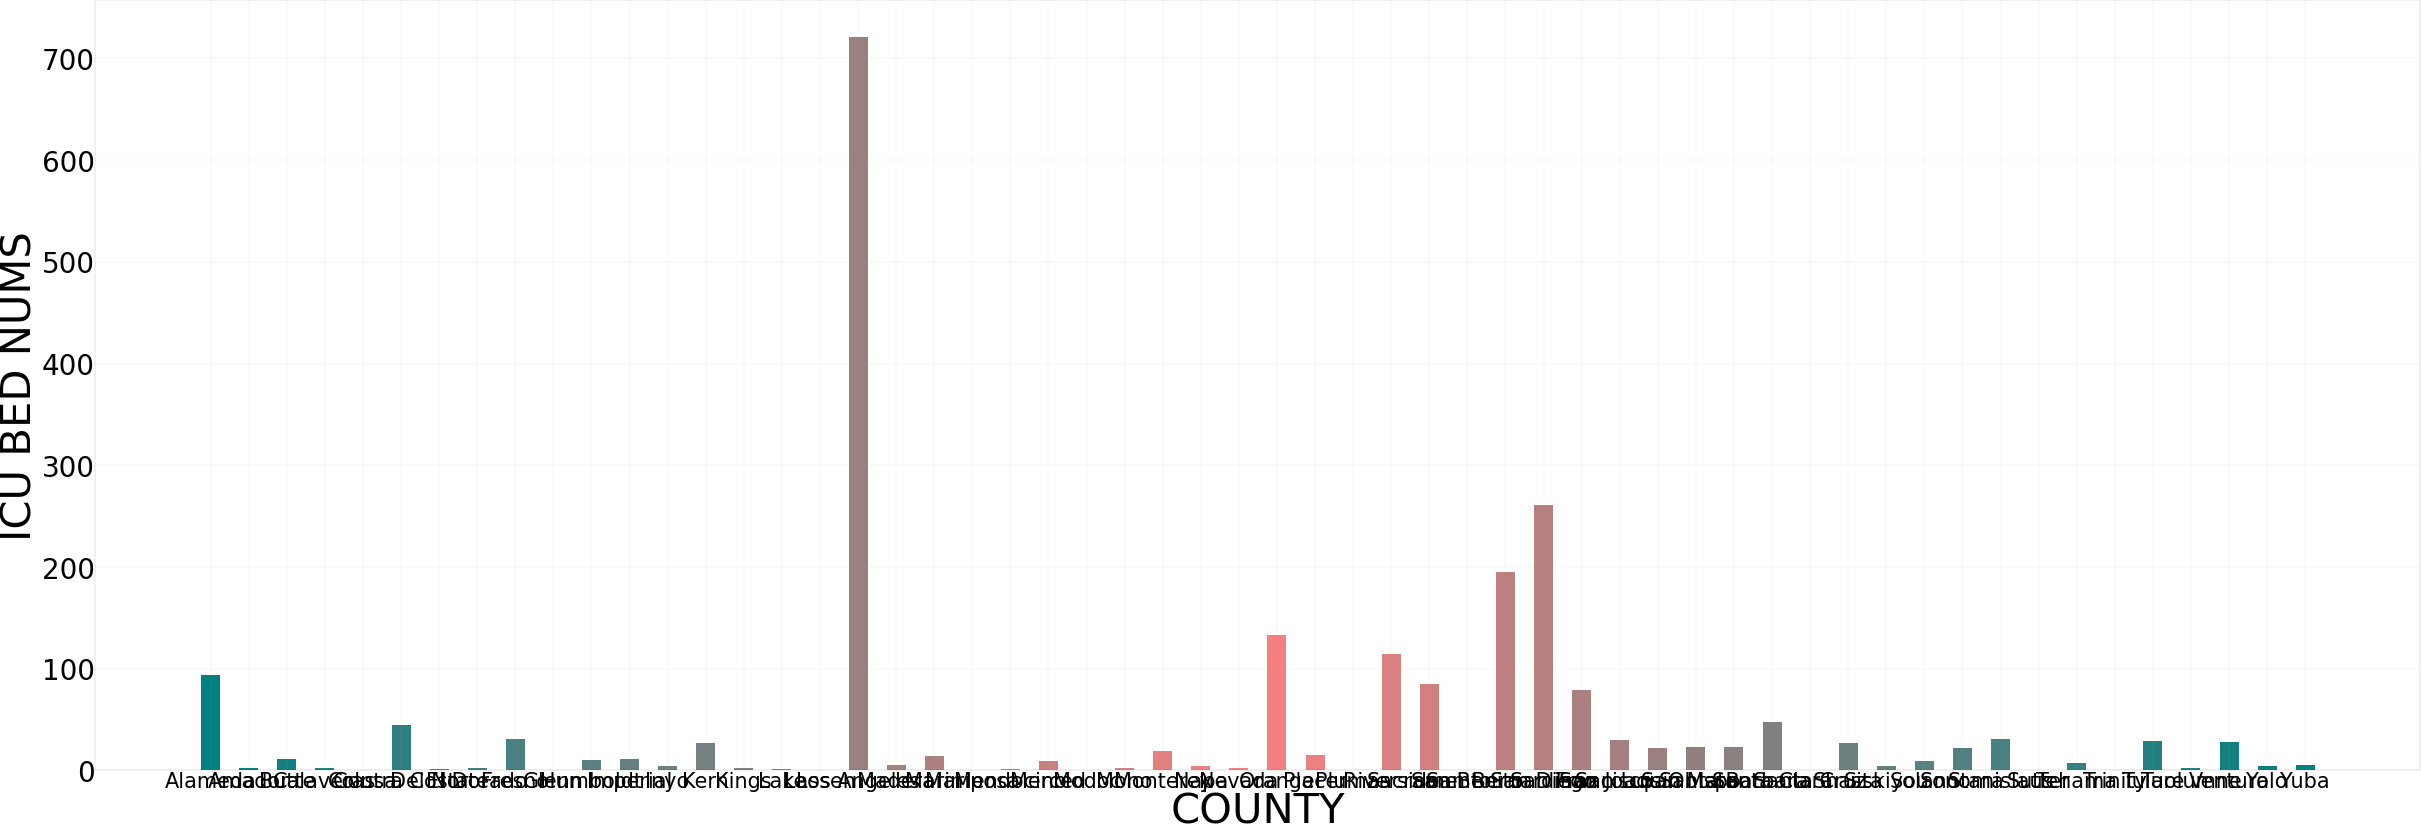

In [8]:
bar2_df = cal_df[['county','icu_available_beds']]
plot_bar_color(bar2_df['icu_available_beds'],bar2_df['county'],'COUNTY','ICU BED NUMS')
plt.show()

In [9]:
dfmax=bar2_df.nlargest(1,'icu_available_beds',keep='all')
print(dfmax)
print('the rich beds of cuntry is '+ str(dfmax['county']))
print('have beds mun is' + str(dfmax['icu_available_beds']))

         county  icu_available_beds
17  Los Angeles               721.0
the rich beds of cuntry is 17    Los Angeles
Name: county, dtype: object
have beds mun is17    721.0
Name: icu_available_beds, dtype: float64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 4 to 50
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county              10 non-null     object 
 1   all_hospital_beds   10 non-null     float64
 2   icu_available_beds  10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 55
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county              46 non-null     object 
 1   all_hospital_beds   46 non-null     float64
 2   icu_available_beds  46 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


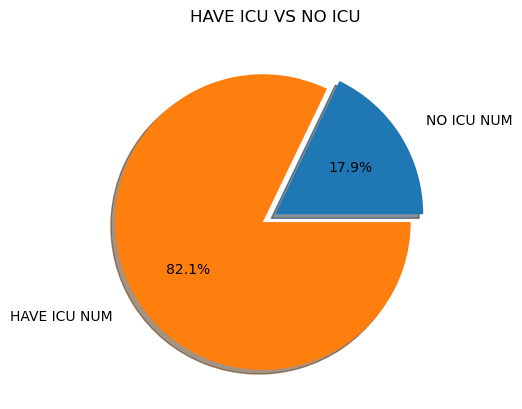

In [10]:
# counties with 0 icu_available_beds
no_beds_df = cal_df[cal_df['icu_available_beds']==0]
have_beds_df =cal_df[cal_df['icu_available_beds']!=0]
no_beds_df.info()
have_beds_df.info()
x=[10,46]
plt.title('HAVE ICU VS NO ICU')
plt.pie(x,labels=['NO ICU NUM','HAVE ICU NUM'],labeldistance=1.2,autopct='%1.1f%%',explode=(0,0.1),shadow=True)
plt.show()

In [11]:
pop_df = pd.read_csv('csvData.csv')

In [12]:
print(pop_df)

                   CTYNAME   pop2022  GrowthRate  popDensity
0       Los Angeles County  10053089      2.3882   2477.2889
1         San Diego County   3339298      7.8824    793.8101
2            Orange County   3222341      7.0463   4074.7985
3         Riverside County   2463893     12.5250    341.9039
4    San Bernardino County   2210942      8.6346    110.2326
5       Santa Clara County   1967183     10.4140   1524.6920
6           Alameda County   1716769     13.6729   2322.8064
7        Sacramento County   1618309     14.0628   1677.1080
8      Contra Costa County   1189307     13.3726   1645.5467
9            Fresno County   1024294     10.0859    171.8954
10             Kern County    923155      9.9477    113.5216
11    San Francisco County    887711     10.2425  18930.0386
12          Ventura County    847947      2.9914    460.0874
13      San Joaquin County    798019     16.4471    573.5466
14        San Mateo County    773640      7.6817   1725.0492
15       Stanislaus Coun

In [13]:
for county in pop_df['CTYNAME']:
    pop_df.replace(to_replace=county,value=county.rstrip('County'),inplace=True)
    
pop_df.sort_values('CTYNAME',inplace=True)
pop_df.reset_index(drop=True,inplace=True)
pop_df.head()

,CTYNAME,pop2022,GrowthRate,popDensity
0,Alameda,1716769,13.6729,2322.8064
1,Alpine,1210,2.9787,1.6389
2,Amador,40950,7.5057,68.8725
3,Butte,209958,-4.5645,128.2998
4,Calaveras,45234,-0.7548,44.3465


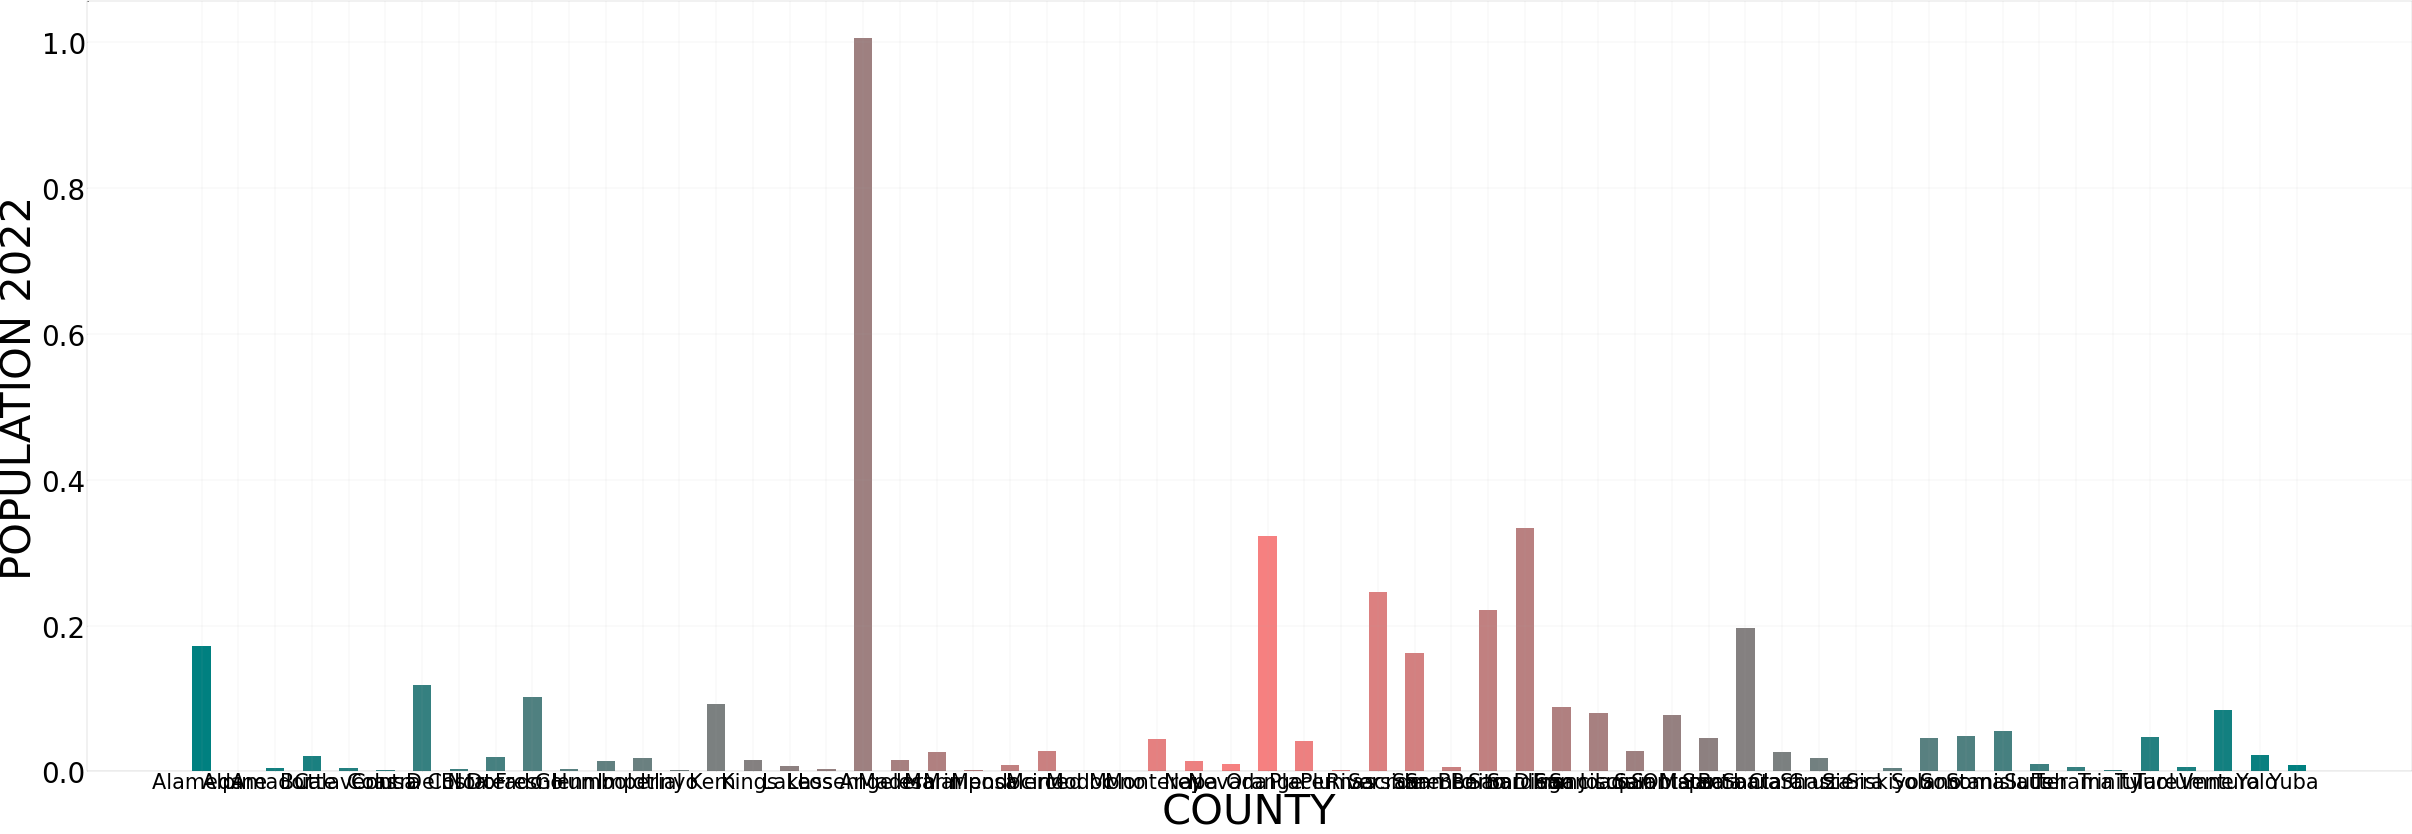

In [14]:
pop_df = pop_df[['CTYNAME','pop2022']]
plot_bar_color(pop_df['pop2022'],pop_df['CTYNAME'],'COUNTY','POPULATION 2022')
plt.show()

In [15]:
dfmax=pop_df.nlargest(10,'pop2022',keep='all')
print(dfmax)
print('the most population of cuntry is '+ str(dfmax['CTYNAME']))
print('population num is' + str(dfmax['pop2022']))

            CTYNAME   pop2022
18     Los Angeles   10053089
36       San Diego    3339298
29          Orange    3222341
32       Riverside    2463893
35  San Bernardino    2210942
42     Santa Clara    1967183
0          Alameda    1716769
33      Sacramento    1618309
6     Contra Costa    1189307
9           Fresno    1024294
the most population of cuntry is 18       Los Angeles 
36         San Diego 
29            Orange 
32         Riverside 
35    San Bernardino 
42       Santa Clara 
0            Alameda 
33        Sacramento 
6       Contra Costa 
9             Fresno 
Name: CTYNAME, dtype: object
population num is18    10053089
36     3339298
29     3222341
32     2463893
35     2210942
42     1967183
0      1716769
33     1618309
6      1189307
9      1024294
Name: pop2022, dtype: int64


In [16]:
us_counties_df = pd.read_csv('uscounties.csv')
us_counties_df.head()

,county,county_ascii,county_fips,state_id,state_name,lat,lng,population
0,Los Angeles,Los Angeles,6037,CA,California,34.3207,-118.2248,10081570
1,Cook,Cook,17031,IL,Illinois,41.8401,-87.8168,5198275
2,Harris,Harris,48201,TX,Texas,29.8577,-95.3936,4646630
3,Maricopa,Maricopa,4013,AZ,Arizona,33.3490,-112.4915,4328810
4,San Diego,San Diego,6073,CA,California,33.0341,-116.7353,3316073


In [17]:
coor_df = us_counties_df[us_counties_df['state_id']=='CA']
coor_df.head()

,county,county_ascii,county_fips,state_id,state_name,lat,lng,population
0,Los Angeles,Los Angeles,6037,CA,California,34.3207,-118.2248,10081570
4,San Diego,San Diego,6073,CA,California,33.0341,-116.7353,3316073
5,Orange,Orange,6059,CA,California,33.7030,-117.7611,3168044
9,Riverside,Riverside,6065,CA,California,33.7437,-115.9938,2411439
13,San Bernardino,San Bernardino,6071,CA,California,34.8414,-116.1784,2149031


In [18]:
coor_df.drop(columns=['county_ascii','county_fips','state_id','state_name'],inplace=True)
coor_df.sort_values(by='county',inplace=True)
coor_df.reset_index(drop=True,inplace=True)

In [19]:
coor_df.drop([1,45],axis=0,inplace=True)
coor_df.reset_index(drop=True,inplace=True)
coor_df.head()

,county,lat,lng,population
0,Alameda,37.6469,-121.8889,1656754
1,Amador,38.4464,-120.6511,38429
2,Butte,39.6669,-121.6007,225817
3,Calaveras,38.2046,-120.5541,45514
4,Colusa,39.1775,-122.2370,21454


In [20]:
cal_df = cal_df.merge(coor_df,how='inner',on='county')
cal_df.head()

,county,all_hospital_beds,icu_available_beds,lat,lng,population
0,Alameda,2496.0,94.0,37.6469,-121.8889,1656754
1,Amador,54.0,2.0,38.4464,-120.6511,38429
2,Butte,414.0,11.0,39.6669,-121.6007,225817
3,Calaveras,33.0,2.0,38.2046,-120.5541,45514
4,Colusa,48.0,0.0,39.1775,-122.2370,21454


In [21]:
cal_df.tail()

,county,all_hospital_beds,icu_available_beds,lat,lng,population
51,Tulare,666.0,29.0,36.2201,-118.8005,461898
52,Tuolumne,72.0,2.0,38.0276,-119.9548,54045
53,Ventura,1202.0,28.0,34.4565,-119.0836,847263
54,Yolo,132.0,4.0,38.6866,-121.9016,217352
55,Yuba,267.0,5.0,39.2690,-121.3513,76360


In [22]:
cal_df['Bed_per_100_people'] = (cal_df['all_hospital_beds']/cal_df['population'])*100
cal_df['ICU_Bed_per_100_people'] = (cal_df['icu_available_beds']/cal_df['population'])*100
cal_df.head()

,county,all_hospital_beds,icu_available_beds,lat,lng,population,Bed_per_100_people,ICU_Bed_per_100_people
0,Alameda,2496.0,94.0,37.6469,-121.8889,1656754,0.150656,0.005674
1,Amador,54.0,2.0,38.4464,-120.6511,38429,0.140519,0.005204
2,Butte,414.0,11.0,39.6669,-121.6007,225817,0.183334,0.004871
3,Calaveras,33.0,2.0,38.2046,-120.5541,45514,0.072505,0.004394
4,Colusa,48.0,0.0,39.1775,-122.2370,21454,0.223735,0.000000


In [23]:
cal_df.drop(columns=['lat_x','lng_x','lat_y','lng_y'],inplace=True)
cal_df.head()

KeyError: "['lat_x' 'lng_x' 'lat_y' 'lng_y'] not found in axis"

In [24]:
cal_df_max=cal_df.nlargest(10,'Bed_per_100_people',keep='all')
print(cal_df_max)

           county  all_hospital_beds  icu_available_beds      lat       lng  \
55           Yuba              267.0                 5.0  39.2690 -121.3513   
43         Shasta              568.0                27.0  40.7637 -122.0405   
36  San Francisco             2158.0                79.0  37.7562 -122.4430   
47     Stanislaus             1220.0                31.0  37.5591 -120.9977   
4          Colusa               48.0                 0.0  39.1775 -122.2370   
18         Madera              331.0                 5.0  37.2180 -119.7627   
10       Humboldt              281.0                10.0  40.6993 -123.8756   
29         Placer              786.0                15.0  39.0635 -120.7175   
6       Del Norte               54.0                 1.0  41.7431 -123.8972   
35      San Diego             6472.0               261.0  33.0341 -116.7353   

    population  Bed_per_100_people  ICU_Bed_per_100_people  
55       76360            0.349660                0.006548  
43      

In [25]:
!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 11.1 MB/s eta 0:00:00


In [26]:
from geopy.geocoders import Nominatim

address = 'California, CA' 
geolocator = Nominatim(user_agent='ca_explorer')
location = geolocator.geocode(address)
lati = location.latitude
long = location.longitude

In [27]:
california_map = folium.Map(location=[lati,long],zoom_start=11)

for lat,lng,name,county in zip(cal_df['lat'],cal_df['lng'],cal_df['ICU_Bed_per_100_people'],cal_df['county']):
    label = '{},{}'.format(name,county)
    label = folium.Popup(label,parse_html=True)
    folium.CircleMarker(
          [lat,lng],
          popup=label,
          radius=5,
          color='blue',
          fill=True,
          fill_color='#3186cc',
          fill_opacity=0.7).add_to(california_map)
california_map

CLUSTER MODEL

In [28]:
clusters_df = cal_df.drop(columns=['county','all_hospital_beds','icu_available_beds','lat','lng'])
clusters_df.head()

,population,Bed_per_100_people,ICU_Bed_per_100_people
0,1656754,0.150656,0.005674
1,38429,0.140519,0.005204
2,225817,0.183334,0.004871
3,45514,0.072505,0.004394
4,21454,0.223735,0.000000


In [29]:
clusters_df = sklearn.preprocessing.StandardScaler().fit_transform(clusters_df)
clusters_df

array([[ 0.6468574 ,  0.12551563,  0.27963956],
       [-0.44890964, -0.03845196,  0.1661841 ],
       [-0.32202932,  0.65408305,  0.08563825],
       [-0.44411239, -1.13856696, -0.02965594],
       [-0.4604034 ,  1.30755236, -1.09189122],
       [ 0.29848768, -0.36567148, -0.1395629 ],
       [-0.45631304,  0.86540896, -0.2127027 ],
       [-0.34725398, -0.78444996, -0.8354964 ],
       [ 0.19168878,  0.41098893, -0.33073738],
       [-0.45598736, -0.8659043 , -1.09189122],
       [-0.38288499,  1.03216403,  0.68634096],
       [-0.35257734, -0.50318924,  0.37963451],
       [-0.46275767,  0.29795942,  4.28682344],
       [ 0.12609138, -0.49456302, -0.35659533],
       [-0.37289709, -1.30235168, -0.77105868],
       [-0.43146349, -0.67355755, -0.71533093],
       [-0.45406304, -0.99919983, -1.09189122],
       [ 6.35129603,  0.76639525,  0.63690111],
       [-0.36968629,  1.1331706 , -0.31428002],
       [-0.29892262, -0.06501566,  0.2100328 ],
       [-0.46313482, -1.56851096, -1.091

In [38]:
!pip install scikit-learn==0.23.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 67.3 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 38.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


ImportError: cannot import name 'calinski_harabasz_score' from 'sklearn.metrics' (/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [39]:
!pip install aikit==0.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.3/177.3 kB 19.0 MB/s eta 0:00:00


In [41]:
from sklearn.metrics import calinski_harabaz_score

In [46]:
k_value=list()
for k in range(3,30):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(clusters_df)
    creator_clust = kmeans_model.labels_
    cluster_centers = kmeans_model.cluster_centers_
    #print('打印分数')
    k_value_tmp=calinski_harabaz_score(clusters_df,creator_clust)
    k_value.append(k_value_tmp)
print(k_value)

[28.785725348612882, 32.98724354808978, 36.9698374522331, 41.00467740676857, 44.21746516575633, 48.24965403538285, 45.597963955508305, 48.30366965095984, 48.9501617968391, 51.63904444323224, 52.983787728370196, 54.18225123573394, 55.577743602371456, 58.404626778992196, 57.03645659392107, 60.25763899994996, 59.89263533179381, 60.1378545660624, 63.760502737507025, 65.84911823089512, 68.66584500303811, 69.02297216669032, 68.9042317560759, 79.32207547638465, 80.87680378496094, 78.91201523912005, 81.99881450194859]


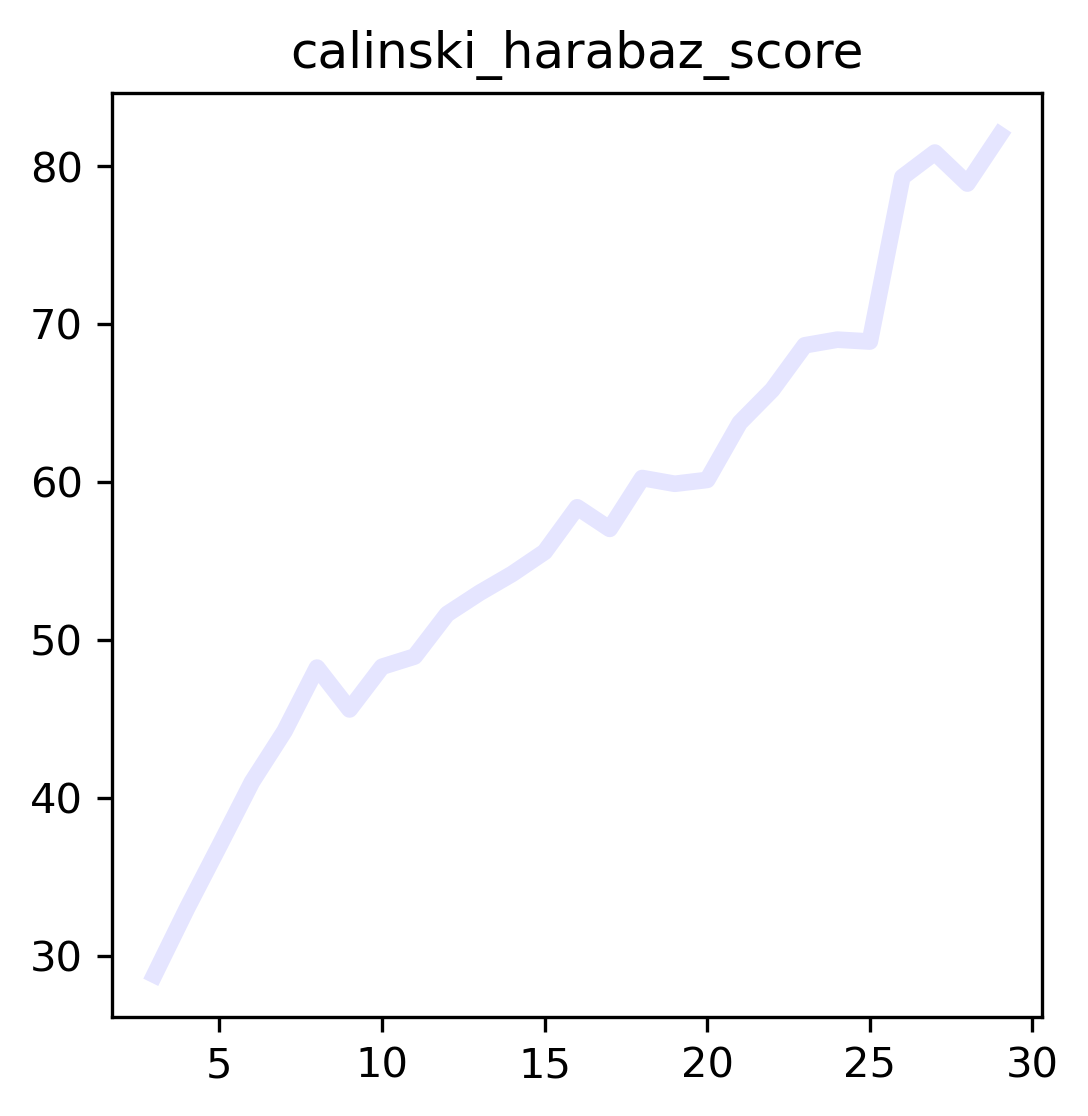

In [51]:
x=list(np.arange(3, 30))
y=k_value
fig=plt.figure(figsize=(4, 4), dpi=300)
plt.plot(x, y, lw=4, ls='-', c='b', alpha=0.1)
plt.title('calinski_harabaz_score')
plt.show()
fig.savefig("best score")

In [52]:
kclusters = 8
kmeans = KMeans(n_clusters=kclusters, random_state = 0)
kmeans.fit(clusters_df)
kmeans.labels_

array([6, 3, 0, 3, 0, 3, 0, 5, 0, 5, 0, 3, 4, 3, 5, 5, 5, 1, 0, 3, 5, 5,
       3, 5, 7, 0, 3, 3, 6, 0, 0, 6, 6, 5, 6, 6, 2, 3, 7, 3, 3, 6, 5, 2,
       7, 3, 3, 0, 5, 7, 5, 3, 3, 3, 5, 2], dtype=int32)

In [53]:
cal_df.insert(0,'Cluster_labels',kmeans.labels_)
cal_df.head()

,Cluster_labels,county,all_hospital_beds,icu_available_beds,lat,lng,population,Bed_per_100_people,ICU_Bed_per_100_people
0,6,Alameda,2496.0,94.0,37.6469,-121.8889,1656754,0.150656,0.005674
1,3,Amador,54.0,2.0,38.4464,-120.6511,38429,0.140519,0.005204
2,0,Butte,414.0,11.0,39.6669,-121.6007,225817,0.183334,0.004871
3,3,Calaveras,33.0,2.0,38.2046,-120.5541,45514,0.072505,0.004394
4,0,Colusa,48.0,0.0,39.1775,-122.2370,21454,0.223735,0.000000


In [54]:
def save_map(m,filepath):
    m.save(filepath)

In [58]:
# clusters based on Bed_per_100_people

bpp_clusters_map = folium.Map(location=[lati,long],zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# boosts are provided to increase the size of the circle markers 
m_boost = 5
add_boost = 10

markers_colors=[]
for lat,lng,cluster,county,bpp in zip(cal_df['lat'],cal_df['lng'],cal_df['Cluster_labels'],cal_df['county'],clusters_df[:,1]):
    label = 'Cluster '+ str(cluster) +', '+ str(county) + ' county'
    label = folium.Popup(label,parse_html=True)
    folium.CircleMarker(
         [lat,lng],
         radius = bpp*m_boost+add_boost, # size based on bed per 100 people
         popup=label,
         color = rainbow[cluster-1],
         fill = True,
         fill_color = rainbow[cluster-1],
         fill_opacity = 0.7).add_to(bpp_clusters_map)

bpp_clusters_map

In [59]:
icu_clusters_map = folium.Map(location=[lati,long],zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# boosts are provided to increase the size of the circle markers
m_boost = 5
add_boost = 10

markers_colors=[]
for lat,lng,cluster,county,bpp in zip(cal_df['lat'],cal_df['lng'],cal_df['Cluster_labels'],cal_df['county'],clusters_df[:,2]):
    label = 'Cluster '+ str(cluster) +', '+ str(county) + ' county'
    label = folium.Popup(label,parse_html=True)
    
    folium.CircleMarker(
         [lat,lng],
         radius = bpp*m_boost+add_boost, # size based on ICU bed per 100 people
         popup=label,
         color = rainbow[cluster-1],
         fill = True,
         fill_color = rainbow[cluster-1],
         fill_opacity = 0.7).add_to(icu_clusters_map)

icu_clusters_map

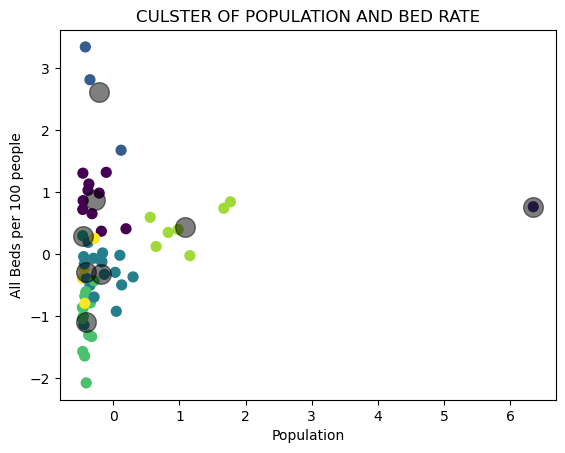

In [61]:
y_kmeans = kmeans.predict(clusters_df)
plt.scatter(clusters_df[:, 0], clusters_df[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('CULSTER OF POPULATION AND BED RATE')
plt.xlabel('Population')
plt.ylabel('All Beds per 100 people')
plt.show()

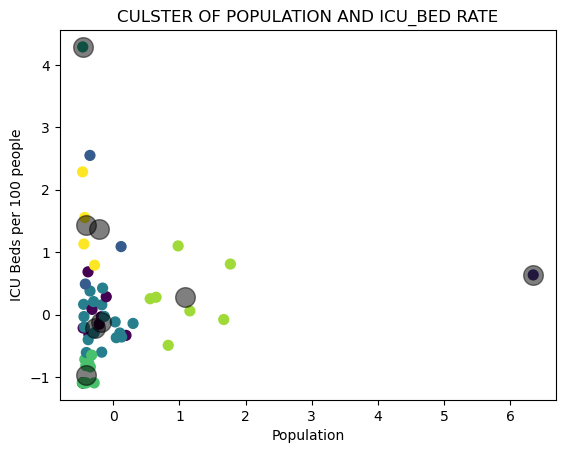

In [62]:
y_kmeans = kmeans.predict(clusters_df)
plt.scatter(clusters_df[:, 0], clusters_df[:, 2], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);
plt.title('CULSTER OF POPULATION AND ICU_BED RATE')
plt.xlabel('Population')
plt.ylabel('ICU Beds per 100 people')
plt.show()

TEST CLUSTER

In [65]:
cal_df[cal_df['Cluster_labels']==0]

,Cluster_labels,county,all_hospital_beds,icu_available_beds,lat,lng,population,Bed_per_100_people,ICU_Bed_per_100_people
2,0,Butte,414.0,11.0,39.6669,-121.6007,225817,0.183334,0.004871
4,0,Colusa,48.0,0.0,39.1775,-122.2370,21454,0.223735,0.000000
6,0,Del Norte,54.0,1.0,41.7431,-123.8972,27495,0.196399,0.003637
8,0,Fresno,1657.0,31.0,36.7582,-119.6493,984521,0.168305,0.003149
10,0,Humboldt,281.0,10.0,40.6993,-123.8756,135940,0.206709,0.007356
18,0,Madera,331.0,5.0,37.2180,-119.7627,155433,0.212953,0.003217
25,0,Monterey,719.0,19.0,36.2172,-121.2392,433410,0.165894,0.004384
29,0,Placer,786.0,15.0,39.0635,-120.7175,385512,0.203885,0.003891
30,0,Plumas,35.0,0.0,40.0046,-120.8385,18660,0.187567,0.000000
47,0,Stanislaus,1220.0,31.0,37.5591,-120.9977,543194,0.224597,0.005707


In [66]:
cal_df[cal_df['Cluster_labels']==1]

,Cluster_labels,county,all_hospital_beds,icu_available_beds,lat,lng,population,Bed_per_100_people,ICU_Bed_per_100_people
17,1,Los Angeles,19183.0,721.0,34.3207,-118.2248,10081570,0.190278,0.007152


In [67]:
cal_df[cal_df['Cluster_labels']==2]

,Cluster_labels,county,all_hospital_beds,icu_available_beds,lat,lng,population,Bed_per_100_people,ICU_Bed_per_100_people
36,2,San Francisco,2158.0,79.0,37.7562,-122.4430,874961,0.246640,0.009029
43,2,Shasta,568.0,27.0,40.7637,-122.0405,179212,0.316943,0.015066
55,2,Yuba,267.0,5.0,39.2690,-121.3513,76360,0.349660,0.006548


In [68]:
cal_df[cal_df['Cluster_labels']==3]

,Cluster_labels,county,all_hospital_beds,icu_available_beds,lat,lng,population,Bed_per_100_people,ICU_Bed_per_100_people
1,3,Amador,54.0,2.0,38.4464,-120.6511,38429,0.140519,0.005204
3,3,Calaveras,33.0,2.0,38.2046,-120.5541,45514,0.072505,0.004394
5,3,Contra Costa,1374.0,45.0,37.9191,-121.9278,1142251,0.120289,0.003940
11,3,Imperial,202.0,11.0,33.0395,-115.3654,180701,0.111787,0.006087
13,3,Kern,997.0,27.0,35.3429,-118.7299,887641,0.112320,0.003042
19,3,Marin,361.0,14.0,38.0734,-122.7234,259943,0.138877,0.005386
22,3,Merced,272.0,9.0,37.1919,-120.7177,271382,0.100228,0.003316
26,3,Napa,216.0,4.0,38.5065,-122.3305,139623,0.154702,0.002865
27,3,Nevada,118.0,2.0,39.3014,-120.7685,99244,0.118899,0.002015
37,3,San Joaquin,927.0,30.0,37.9348,-121.2714,742603,0.124831,0.004040


In [69]:
cal_df[cal_df['Cluster_labels']==4]

,Cluster_labels,county,all_hospital_beds,icu_available_beds,lat,lng,population,Bed_per_100_people,ICU_Bed_per_100_people
12,4,Inyo,29.0,4.0,36.5111,-117.4107,17977,0.161317,0.022251


In [70]:
cal_df[cal_df['Cluster_labels']==5]

,Cluster_labels,county,all_hospital_beds,icu_available_beds,lat,lng,population,Bed_per_100_people,ICU_Bed_per_100_people
7,5,El Dorado,178.0,2.0,38.7787,-120.5247,188563,0.094398,0.001061
9,5,Glenn,25.0,0.0,39.5982,-122.3920,27976,0.089362,0.000000
14,5,Kings,94.0,2.0,36.0753,-119.8155,150691,0.062379,0.001327
15,5,Lake,65.0,1.0,39.0996,-122.7532,64195,0.101254,0.001558
16,5,Lassen,25.0,0.0,40.6736,-120.5943,30818,0.081121,0.000000
20,5,Mariposa,8.0,0.0,37.5815,-119.9054,17420,0.045924,0.000000
21,5,Mendocino,92.0,1.0,39.4402,-123.3915,87224,0.105476,0.001146
23,5,Modoc,8.0,0.0,41.5898,-120.7250,8907,0.089817,0.000000
33,5,San Benito,25.0,0.0,36.6057,-121.0750,60376,0.041407,0.000000
42,5,Santa Cruz,319.0,0.0,37.0562,-122.0018,273962,0.116440,0.000000


In [71]:
cal_df[cal_df['Cluster_labels']==6]

,Cluster_labels,county,all_hospital_beds,icu_available_beds,lat,lng,population,Bed_per_100_people,ICU_Bed_per_100_people
0,6,Alameda,2496.0,94.0,37.6469,-121.8889,1656754,0.150656,0.005674
28,6,Orange,5980.0,133.0,33.7030,-117.7611,3168044,0.188760,0.004198
31,6,Riverside,3413.0,115.0,33.7437,-115.9938,2411439,0.141534,0.004769
32,6,Sacramento,2740.0,85.0,38.4493,-121.3443,1524553,0.179725,0.005575
34,6,San Bernardino,3602.0,195.0,34.8414,-116.1784,2149031,0.167610,0.009074
35,6,San Diego,6472.0,261.0,33.0341,-116.7353,3316073,0.195171,0.007871
41,6,Santa Clara,3173.0,48.0,37.2318,-121.6951,1927470,0.164620,0.002490


In [ ]:
cal_df[cal_df['Cluster_labels']==6]